### Laboratorium 5 - zadania - transformacja Hougha

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

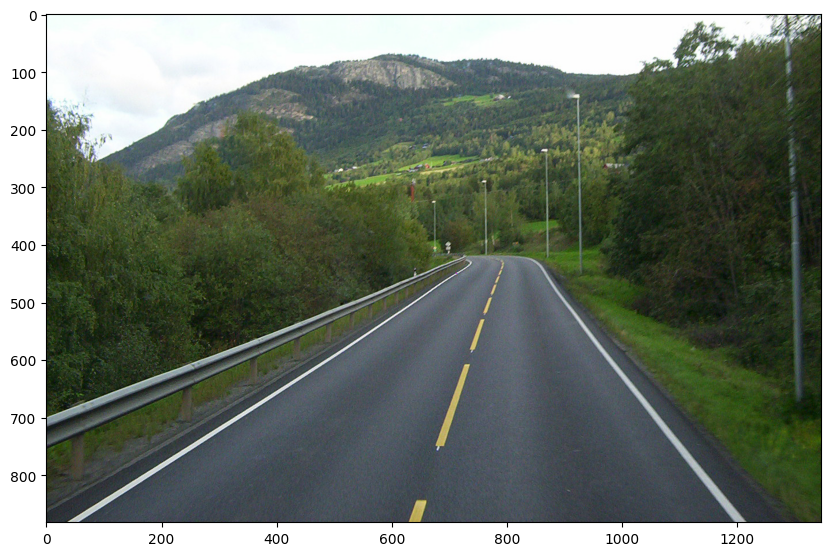

In [2]:
norway = cv2.imread('Lab5_dane/norway.jpg')[..., ::-1]
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway);

In [3]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

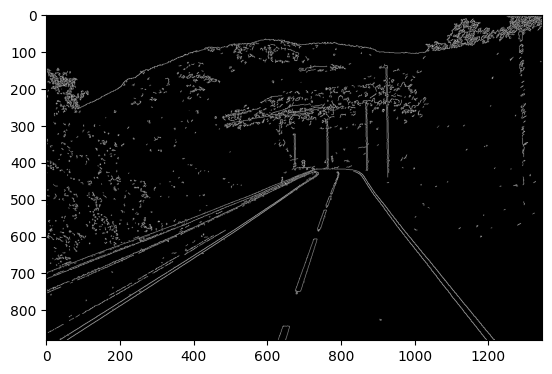

In [4]:
dst = cv2.Canny(norway, 150, 250, None, 3)
plt.imshow(dst, cmap = 'gray')

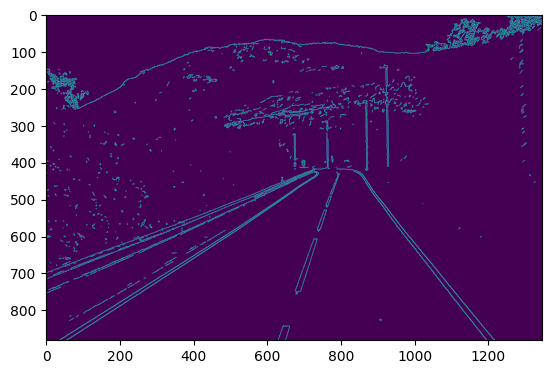

In [5]:
from PIL import Image

norway_gray = cv2.cvtColor(norway, cv2.COLOR_RGB2GRAY)
dst2 = cv2.Canny(norway_gray, 150, 250, None, 3)
# plt.imshow(dst2, cmap = 'gray')
plt.imshow(dst2)

In [6]:
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

In [7]:
norway_with_lines = norway.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        pt1 = x1, y1
        pt2 = x2, y2
        cv2.line(norway_with_lines, pt1, pt2, (255, 0, 0), 1, cv2.LINE_AA)

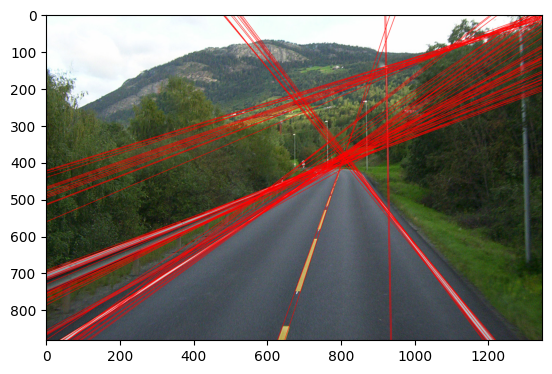

In [8]:
plt.imshow(norway_with_lines)

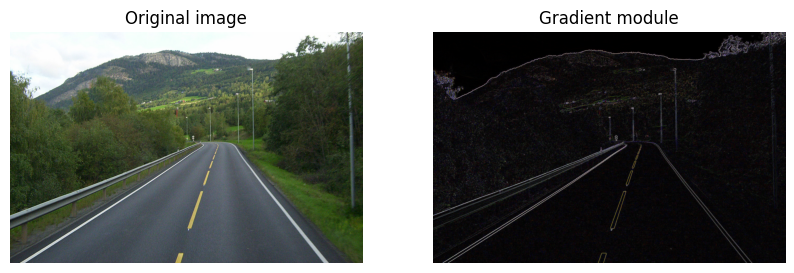

In [9]:
from typing import Literal

def gradient_plot(img, operator: Literal['sobel', 'scharr'] = 'sobel') -> None:
    if operator == 'sobel':
        sobelx = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3)
        sobely = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 3)
    else:
        sobelx = cv2.Scharr(src = img, ddepth = cv2.CV_64F, dx = 1, dy = 0)
        sobely = cv2.Scharr(src = img, ddepth = cv2.CV_64F, dx = 0, dy = 1)
    modul = np.sqrt(sobelx**2 + sobely**2)
    modul = cv2.normalize(modul, None, 0, 255, cv2.NORM_MINMAX)
    modul = modul.astype(np.uint8)

    _, axs = plt.subplots(1, 2, figsize = (10, 7))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].axis('off')
    axs[0].set_title('Original image')
    axs[1].imshow(modul, cmap = 'hot')
    axs[1].axis('off')
    axs[1].set_title('Gradient module')
    plt.show()


gradient_plot(norway)

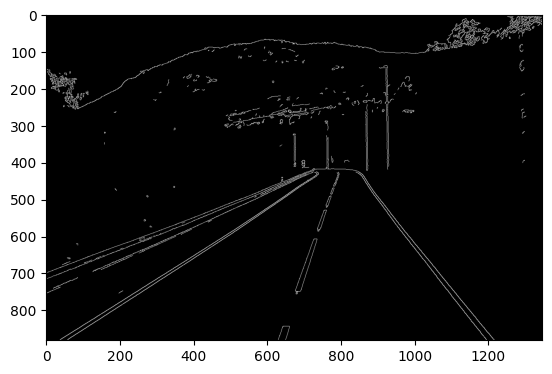

In [10]:
norway_blurred = cv2.GaussianBlur(norway, (3, 3), sigmaX = 0)
dst = cv2.Canny(norway_blurred, 150, 250, None, 3)
plt.imshow(dst, cmap = 'gray')

In [ ]:
def plot_hough(rho, theta):
    dst = cv2.Canny(norway, 150, 250, None, 3)
    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    norway_with_lines = norway.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            pt1 = x1, y1
            pt2 = x2, y2
            cv2.line(norway_with_lines, pt1, pt2, (255, 0, 0), 1, cv2.LINE_AA)

    return norway_with_lines

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

img = norway

fig = go.Figure()
fig = px.imshow(img)

for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))
    

    
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False) 
fig.show()

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

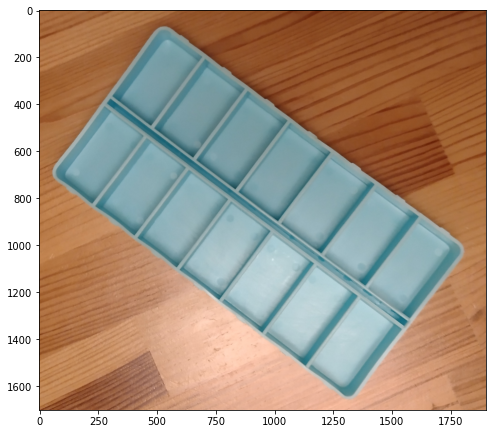

In [4]:
pillbox = cv2.imread('pillbox.png')
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox[..., ::-1]);

Rozwiązanie: